In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
df = pd.read_csv('/content/Groceries data.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [32]:
class MarketBasketAnalyzer:
    def __init__(self, filepath):
        """Initialize Market Basket Analysis"""
        self.df = self.load_data(filepath)
        self.basket, self.transactions_list = self.prepare_market_basket_data()
        self.frequent_itemsets, self.rules = self.perform_market_basket_analysis()

    def load_data(self, filepath):
        """Load and preprocess data"""
        return pd.read_csv(filepath)

    def prepare_market_basket_data(self):
        """Prepare data for market basket analysis"""
        transactions = self.df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
        transactions_list = transactions['itemDescription'].tolist()

        te = TransactionEncoder()
        te_ary = te.fit(transactions_list).transform(transactions_list)
        basket = pd.DataFrame(te_ary, columns=te.columns_)

        return basket, transactions_list

    def perform_market_basket_analysis(self, min_support=0.001):
        """Perform market basket analysis"""
        frequent_itemsets = apriori(self.basket, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

        if frequent_itemsets.empty:
            return frequent_itemsets, pd.DataFrame()  # Return empty rules if no itemsets

        num_itemsets = len(self.transactions_list)
        try:
            rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)
        except TypeError:
            rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

        return frequent_itemsets, rules

    def visualize_product_distribution(self):
        """Visualize top product distributions"""
        plt.figure(figsize=(12, 6))
        self.df['itemDescription'].value_counts().head(10).plot(kind='bar')
        plt.title('Top 10 Product Distribution')
        plt.xlabel('Product')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def visualize_association_rules(self):
        """Create scatter plot of association rules"""
        plt.figure(figsize=(10, 6))
        plt.scatter(self.rules['support'], self.rules['confidence'], c=self.rules['lift'], alpha=0.5)
        plt.colorbar(label='Lift')
        plt.xlabel('Support')
        plt.ylabel('Confidence')
        plt.title('Association Rules Visualization')
        plt.show()

    def create_product_network(self):
        """Create a network graph of product associations"""
        top_rules = self.rules.sort_values('lift', ascending=False).head(20)

        G = nx.DiGraph()
        for _, row in top_rules.iterrows():
            antecedent = next(iter(row['antecedents']))
            consequent = next(iter(row['consequents']))
            G.add_edge(antecedent, consequent, weight=row['lift'])

        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=5000, font_size=10)
        plt.title('Product Relationship Network')
        plt.show()

    def get_product_recommendations(self, selected_product):
        """Generate product recommendations"""
        product_rules = self.rules[self.rules['antecedents'].apply(lambda x: selected_product in x)]

        if product_rules.empty:
            print(f"No recommendations found for {selected_product}")
            return []

        recommendations = product_rules.sort_values('lift', ascending=False)['consequents'].apply(lambda x: next(iter(x)))
        return recommendations.head(5).tolist()

    def summary_report(self):
        """Generate a summary report of market basket analysis"""
        print("Market Basket Analysis Summary:")
        print(f"Total Transactions: {len(self.df)}")
        print(f"Unique Products: {self.df['itemDescription'].nunique()}")
        print(f"Date Range: {self.df['Date'].min()} to {self.df['Date'].max()}")
        print("\nTop Association Rules:")
        print(self.rules.sort_values('lift', ascending=False).head())


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Initialize the analyzer
analyzer = MarketBasketAnalyzer('/content/Groceries data.csv')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


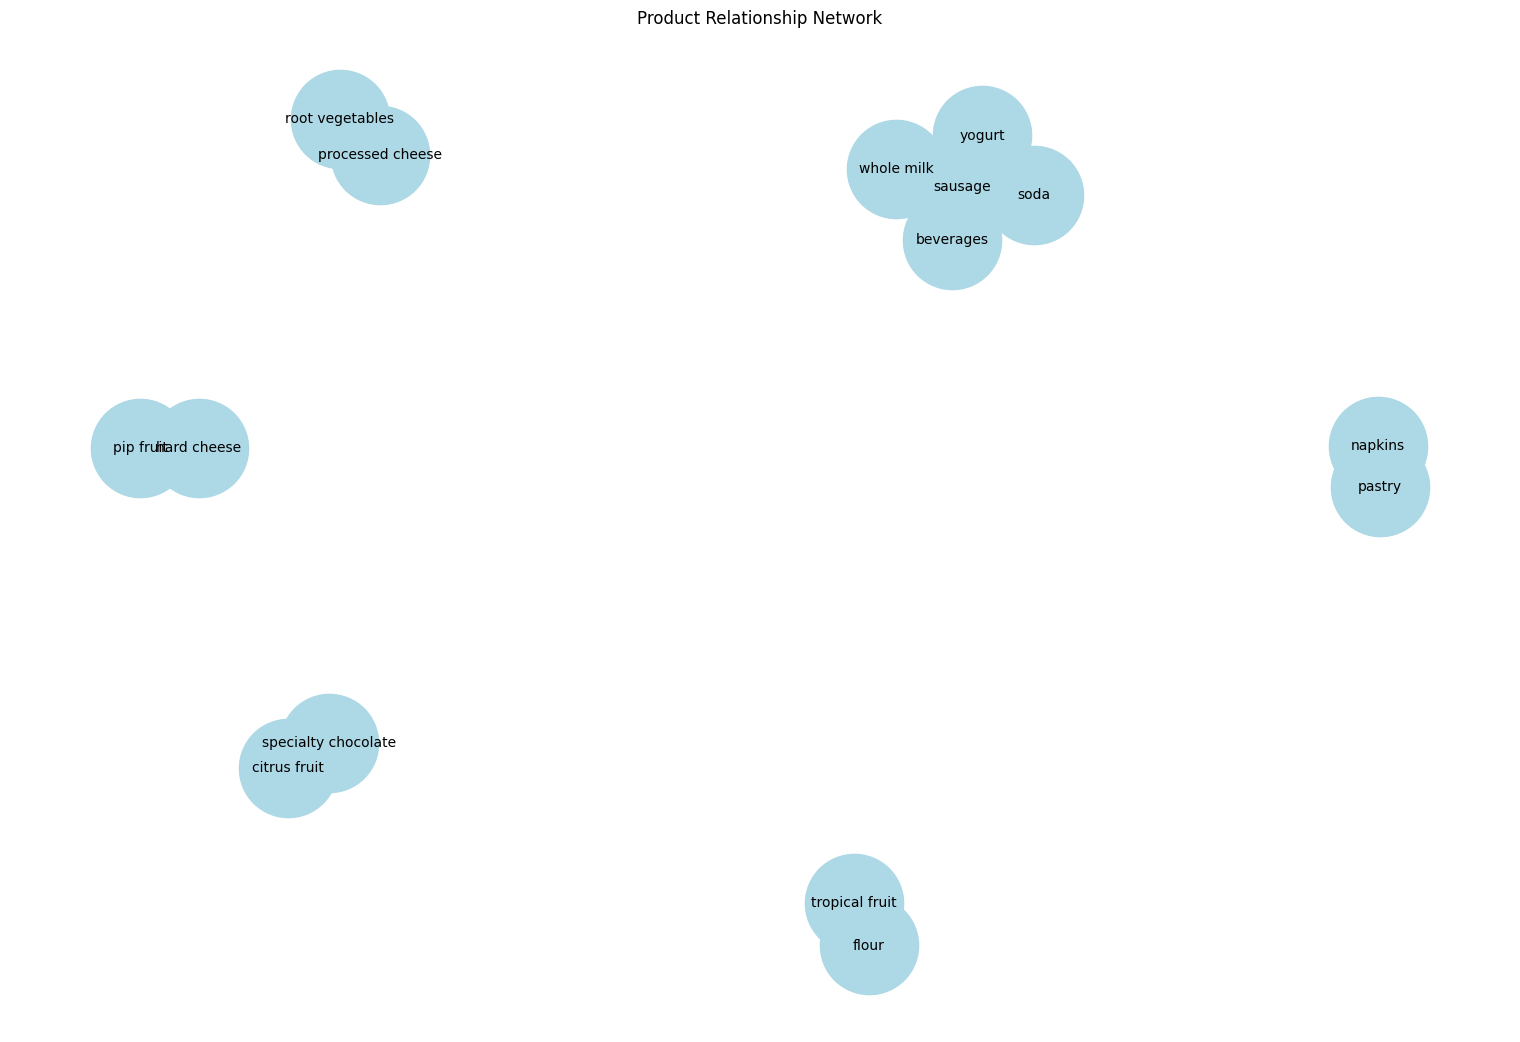

In [34]:
# Create product network
analyzer.create_product_network()


In [35]:
# Get product recommendations
product_name = input("Enter a product name for recommendations: ")
recommendations = analyzer.get_product_recommendations(product_name)
print("Recommendations:", recommendations)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter a product name for recommendations: soda
Recommendations: ['sausage', 'oil', 'sausage', 'beverages', 'other vegetables']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


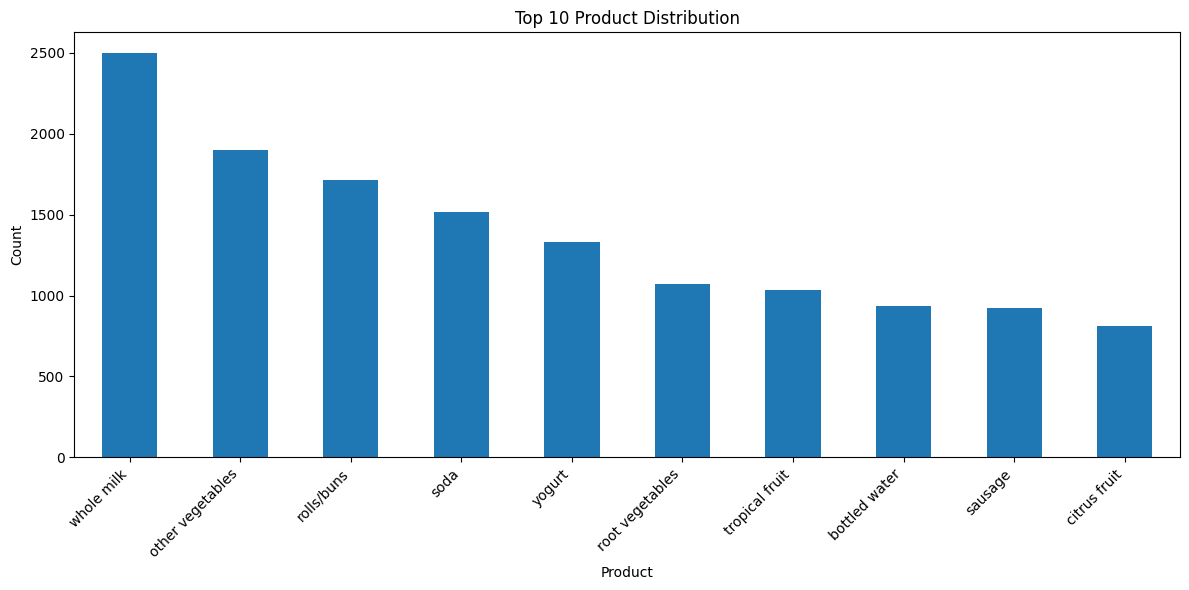

In [36]:
# Visualize product distribution
analyzer.visualize_product_distribution()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


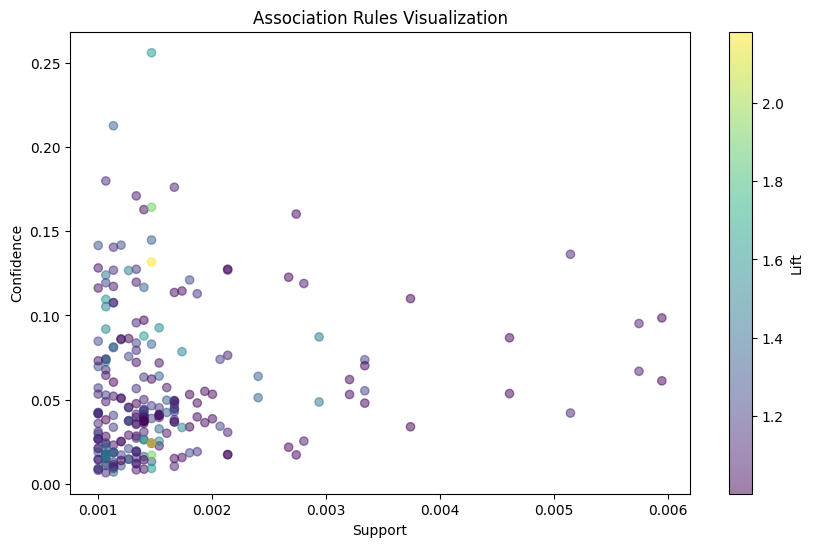

In [37]:
# Visualize association rules
analyzer.visualize_association_rules()


In [38]:
# Generate summary report
analyzer.summary_report()


Market Basket Analysis Summary:
Total Transactions: 38765
Unique Products: 167
Date Range: 2014-01-01 to 2015-12-30

Top Association Rules:
               antecedents            consequents  antecedent support  \
237              (sausage)   (yogurt, whole milk)            0.060349   
236   (yogurt, whole milk)              (sausage)            0.011161   
238               (yogurt)  (sausage, whole milk)            0.085879   
235  (sausage, whole milk)               (yogurt)            0.008955   
87   (specialty chocolate)         (citrus fruit)            0.015973   

     consequent support   support  confidence      lift  representativity  \
237            0.011161  0.001470    0.024363  2.182917               1.0   
236            0.060349  0.001470    0.131737  2.182917               1.0   
238            0.008955  0.001470    0.017121  1.911760               1.0   
235            0.085879  0.001470    0.164179  1.911760               1.0   
87             0.053131  0.001403   

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
